Group members:

Changrui Dong 03677631

Xiaohan Liu 03657359

Yi Zhang 03671544

Ziqin Xu  03677351

Task 1: (1). $$C_1= \left\{ x \in R^p|\parallel x\parallel_\infty \leq \frac{1}{2} \right\} $$

$$C_d = \left\{ x \in R^p|\parallel x\parallel_\infty \leq \frac{d}{2} \right\} $$

$$Pr(X \in C_d)=\prod_{i=1}^p p(\left| x_i \right|\leq \frac{d}{2})=q$$
$x_i$ uniformly distributed on [$-\frac{1}{2},\frac{1}{2}$] $\Rightarrow p(\left| x_i \right|\leq \frac{1}{2})=1$
$$\Rightarrow p(\left| x_i \right|\leq \frac{d}{2})= 
\left\{
\begin{array}{lr}
    d,\ d\in [0,1) \\
    1,\ d\in [1,\infty)
\end{array}
\right.$$

$$\Rightarrow q=Pr(X \in C_d)=\prod_{i=1}^p p(\left| x_i \right|\leq \frac{d}{2})=
\left\{
\begin{array}{lr}
    d^p, \ d\in [0,1) \\
    1, \ d\in [1,\infty)
\end{array}
\right.$$

$\Rightarrow$ $$ 1). d=\sqrt[p]{q}, where \ q\in [0,1)\ , \ p\in Z^{+} \\ 
2). d\in [1, \infty),\ if \ q=1$$

(2)$$Pr(\parallel X^p\parallel_\infty \leq 2.576)=Pr(\left| X^1 \right|\leq2.576)^p=0.99^p.$$

$$Pr(\parallel X^p\parallel_\infty > 2.576)= 1-Pr(\parallel X^p\parallel_\infty \leq 2.576)=1-0.99^p$$

$$\Rightarrow p=2: q=1-0.99^2=0.0199$$

$$\Rightarrow p=3: q=1-0.99^3=0.0297$$

$$\Rightarrow p=500: q=1-0.99^{500}=0.9934$$

In [1]:
from IPython.display import Latex
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt

Task 2: 
Provide the PYTHON code to the following tasks (the code needs to be commented properly):

1) Sample 100 uniformly distributed random vectors from the box $[−1, 1]^{d}$ for d = 2.

In [2]:
random_vectors = np.zeros([2,100]) #initialization for random vector array shape(2,100)
for i in range(0,100):
    random_vectors[0,i] = random.uniform(-1, 1)#choose one value randomly from -1 to 1 (inclusive -1 and 1) , save as value in dim-1
for i in range(0,100):
    random_vectors[1,i] = random.uniform(-1, 1) #choose one value randomly from -1 to 1 (inclusive -1 and 1), save as value in dim-2
#np.array(random_vectors) #display random vectors

2) For each of the 100 vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles. Note that for two vectors x, y the cosine of the angle between the two vectors is defined as 
$\cos(\angle{(x,y)})=\frac{\langle{x,y}\rangle }{\Vert{x}\|\Vert{y}\|}$

In [3]:
angles = np.zeros([1,100])
for i in range(0,100):
    min_angle=5 # initialize minimun of angle as a unrealizable number
    for j in range(0,100):
        if (i!=j):
            x = np.array(random_vectors[:,i])
            y = np.array(random_vectors[:,j])
            current_angle = math.acos(np.dot(x,y)/(np.linalg.norm(x,None)*np.linalg.norm(y,None)))#calculate angles with given formula
            if (current_angle < min_angle):
                min_angle = current_angle #save the minimum angle
    angles[0,i]=min_angle #minimum angle to other vectors for i-th vector (radian)
np.mean(angles) #the average of minimum angles

0.03195626127162595

3)Repeat the above for dimensions d = 1, . . . , 1000 and use the results to plot the average minimum angle against the dimension.

In [4]:
minimum_angles = np.zeros([1,1000])
def random_vector_generator(d):
    random_vectors = np.zeros([d,100]) #initialization for random vector array shape(2,100)
    for dim in range(0,d):
        for i in range(0,100):
            random_vectors[dim,i] = random.uniform(-1, 1)#choose one value randomly from -1 to 1 (inclusive -1 and 1) , save as value in dim-1
    return random_vectors
def min_angle(random_vectors): #do angle calculation
    angles = np.zeros([1,100])
    for i in range(0,100):
        min_angle=5
        for j in range(0,100):
            if (i!=j):
                x = np.array(random_vectors[:,i])#d-dim
                y = np.array(random_vectors[:,j])#d-dim
                current_angle = math.acos(np.dot(x,y)/(np.linalg.norm(x,None)*np.linalg.norm(y,None)))
                if (current_angle < min_angle):
                    min_angle = current_angle
        angles[0,i]=min_angle #radian
    return np.mean(angles)
for d in range(1,1001): 
    random_vectors = random_vector_generator(d) #call the subfunction
    minimum_angles[0,d-1] = min_angle(random_vectors) #save minimum angles of different dimensions

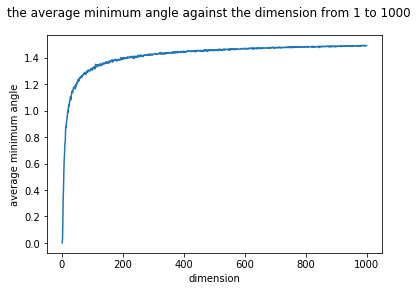

In [5]:
fig = plt.figure() 
plt.plot(np.linspace(1, d, d), minimum_angles.T); # plot values
fig.suptitle('the average minimum angle against the dimension from 1 to 1000'); 
plt.xlabel('dimension');
plt.ylabel('average minimum angle');

4)Give an interpretation of the result. What conclusions can you draw for 2 ran- domly sampled vectors in a d-dimensional space?

The angle between 2 randomly drawn vectors tends to increase as the dimension increases, but it will converge in very large dimension.

5)Does the result change if the sample size increases?

The average minimum angle in low dimensions might not change, but in high dimensions the result might look different. Because the current sample size 100 could be sufficient for lower dimensions. It is however too small when it comes to high dimensions e.g. d = 1000. A larger sample size will reduce the generalization error, thus the result might look different.

Task3:
1) The 6 probabilities sum up to 1. Therefore it is a probability table.

$$P(X=1,Y=1)+P(X=1,Y=2)+...+P(X=2,Y=3)=0.02+0.26+...+0.05=1$$

2) First let's compute $E_{Y|X=2}[Y]$:  

$$P(X=2)=P(X=2,Y=1)+P(X=2,Y=2)+P(X=2,Y=3)=0.4+0.14+0.05=0.59$$ 
$$P(Y=1|X=2)=\frac{P(X=2,Y=1)}{P(X=2)}=\frac{0.4}{0.59}=0.68$$ 
$$P(Y=2|X=2)=\frac{P(X=2,Y=2)}{P(X=2)}=\frac{0.14}{0.59}=0.24$$ 
$$P(Y=3|X=2)=\frac{P(X=2,Y=3)}{P(X=2)}=\frac{0.05}{0.59}=0.08$$ 
$$E_{Y|X=2}[Y]=1*P(Y=1|X=2)+2*P(Y=2|X=2)+3*P(Y=3|X=2)=1*0.68+2*0.24+3*0.08=1.4$$

Then let's compute $P(X = 1|Y = 3)$:

$$P(Y=3)=P(X=1,Y=3)+P(X=2,Y=3)=0.13+0.05=0.18$$
$$P(X=1|Y=3)=\frac{P(X=1,Y=3)}{P(X=3)}=\frac{0.13}{0.18}=0.72$$ 

3) $p(x,y)$ is not a joint density function, because
$$\int_0^\frac{1}{2}\int_0^1 1\,dx\,dy=\frac{1}{2}\neq 1.$$

4)$$p(x)=\int_x^\infty 2e^{-(x+y)}\,dy=2e^{-x}\int_x^\infty e^{-y}\,dy=2e^{-x}[-e^{-y}]_x^\infty=2e^{-2x}$$ 
$$p(y)=\int_0^y 2e^{-(x+y)}\,dx=2e^{-y}\int_0^y e^{-x}\,dx=2e^{-y}[-e^{-x}]_0^y=2e^{-y}(-e^{-y}+1)=2e^{-y}-2e^{-2y}$$ 

5)$$p(Y=\frac{1}{2})=\int_0^3 p(x,\frac{1}{2})\,dx=\int_0^3\frac{1}{15}(2x+4*\frac{1}{2})\,dx=\frac{1}{15}[x^2+2x]_0^3=\frac{1}{15}*15=1$$
$$p(X\leq2,Y=\frac{1}{2})=\int_0^2 p(x,\frac{1}{2})\,dx=\int_0^2\frac{1}{15}(2x+4*\frac{1}{2})\,dx=\frac{1}{15}[x^2+2x]_0^2=\frac{1}{15}*8=\frac{8}{15}$$
$$P(X\leq2|Y=\frac{1}{2})=\frac{p(X\leq2,Y=\frac{1}{2})}{p(Y=\frac{1}{2})}=\frac{8}{15}$$

Task 4: $$
\mathbf{C} = 
\begin{bmatrix}
Var(X_1) & Cov(X_1,X_2) & \ldots & Cov(X_1,X_p) \\
Cov(X_2,X_1) & Var(X_2) & \ldots & Cov(X_2,X_p) \\
\vdots & \vdots & \ddots & \vdots \\
Cov(X_p,X_1) & Cov(X_p,X_2) & \ldots & Var(X_p)
\end{bmatrix}
$$


$$Cov(X_i,X_j) = Cov(X_j,X_i) \quad\quad \forall i, j \in 1,\ldots,p$$
$$
\mathbf{C} = 
\begin{bmatrix}
Var(X_1) & Cov(X_1,X_2) & \ldots & Cov(X_1,X_p) \\
Cov(X_1,X_2) & Var(X_2) & \ldots & Cov(X_2,X_p) \\
\vdots & \vdots & \ddots & \vdots \\
Cov(X_1,X_p) & Cov(X_2,X_p) & \ldots & Var(X_p)
\end{bmatrix}
 = \mathbf{C}^T
$$

$\Rightarrow \,\,\mathbf{C}\,$is symmetric.

$$\mathbf{C} = \mathsf{E}[(X-\mathsf{E}[X])(X-\mathsf{E}[X])^T]$$

$$\begin{align}\mathsf{x}^T\mathbf{C}\mathsf{x} &= 
\mathsf{x}^T\mathsf{E}[(X-\mathsf{E}[X])(X-\mathsf{E}[X])^T]\mathsf{x}\\
&= \mathsf{E}[\mathsf{x}^T(X-\mathsf{E}[X])(X-\mathsf{E}[X])^T\mathsf{x}]
\end{align}$$

for$\,\mathsf{x},\,X\in \mathbb{R}^p,\, \mathsf{E}[X]\in \mathbb{R}^p,\,$we define

$$s = \mathsf{x}^T(X-\mathsf{E}[X]) = (X-\mathsf{E}[X])^T\mathsf{x}\,,$$ 

where $s\in \mathbb{R}\,.$ Therefore\,$$\mathsf{E}[s^2]\geqslant0\,.$$

The covariance matrix $\mathbf{C}$ of any random variable $X\in \mathbb{R}^p$ is
symmetric positive semidefinite.